# Importing the packages and the dataset

# Business Problem
** Rerun with dummy variables.**
** Create a new dataset with imbalanced dataset so that we use class imbalance technique. **
**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
import seaborn as sns

import dask.dataframe as dd

In [3]:
%%time

train = pd.read_csv('telecom_train.csv')
test = pd.read_csv('telecom_test.csv')

Wall time: 1.42 s


In [7]:
%%time

df_train = dd.read_csv('telecom_train.csv')
df_test = dd.read_csv('telecom_test.csv')

Wall time: 101 ms


In [68]:
col_names = ['Duration', 'Protocol_type','Service','Flag','Src_bytes','Dst_bytes',
            'Land','Wrong_fragment','Urgent','Hot','Num_failed_logins','Logged_in',
            'Num_compromised','Root_shell','Su_attempted','Num_root','Num_file_creations',
            'Num_shells','Num_access_files','Num_outbound_cmds','Is_hot_login',
            'Is_guest_login','Count','Srv_count','Serror_rate','Srv_serror_rate',
            'Rerror_rate','Srv_rerror_rate','Same_srv_rate','Diff_srv_rate',
            'Srv_diff_host_rate','Dst_host_count','Dst_host_srv_count',
            'Dst_host_same_srv_rate','Dst_host_diff_srv_rate',
            'Dst_host_same_src_port_rate','Dst_host_srv_diff_host_rate',
            'Dst_host_serror_rate','Dst_host_srv_serror_rate',
            'Dst_host_rerror_rate','Dst_host_srv_rerror_rate','attack','last_flag']        

In [69]:
# Lets have a look at the number of columns

len(col_names)

43

In [70]:
# Lets set the columns for the train and test datasets

train.columns = col_names
test.columns = col_names

In [71]:
print(train.shape)
print(test.shape)

(125972, 43)
(22543, 43)


In [72]:
train = pd.concat([train, test], axis=0)
print(train.shape)

(148515, 43)


In [73]:
pd.set_option('display.max_columns', 50)

train.head()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_root,Num_file_creations,Num_shells,Num_access_files,Num_outbound_cmds,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Srv_serror_rate,Rerror_rate,Srv_rerror_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_rate,Dst_host_count,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [74]:
# Lets have a look at the attack column which is the target column to be predicted

train.iloc[:,-2].value_counts()

normal             77053
neptune            45870
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
ftp_write             11
loadmodule            11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
udpstorm               2
worm                   2
sqlattack              2
spy                    2


In [75]:
# How many labels do we have in our target column

train.iloc[:,-2].nunique()

40

The labels are highly imbalanced with minimum 2 and maximum 41214 values. Building a model with so many unbalanced labels is not possible by balancing classes or SMOTE technique. Lets try to classify attack or normal.

# Exploratory Data Analysis

In [76]:
import pandas_profiling

reports1=pandas_profiling.ProfileReport(train)

In [77]:
reports1.to_file('train_merge_EDA.html')

In this report we are able to see that there is strong correlation between a lot of columns.  <br>
If this were a regression problem these columns are bad and needed to be dropped. But this is a classification columns.

In [78]:
# Checking the data types and missing values

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148515 entries, 0 to 22542
Data columns (total 43 columns):
Duration                       148515 non-null int64
Protocol_type                  148515 non-null object
Service                        148515 non-null object
Flag                           148515 non-null object
Src_bytes                      148515 non-null int64
Dst_bytes                      148515 non-null int64
Land                           148515 non-null int64
Wrong_fragment                 148515 non-null int64
Urgent                         148515 non-null int64
Hot                            148515 non-null int64
Num_failed_logins              148515 non-null int64
Logged_in                      148515 non-null int64
Num_compromised                148515 non-null int64
Root_shell                     148515 non-null int64
Su_attempted                   148515 non-null int64
Num_root                       148515 non-null int64
Num_file_creations             148515 n

**There are no null values.**

In [79]:
basic_features = ['Duration', 'Protocol_Type', 'Service', 'Flag', 'Src_bytes', 'Dst_bytes', 'Land', 'Wrong_fragment', 'Urgent']

In [80]:
content_features = ['Hot', 'Num_failed_logins', 'Logged_in', 'Num_compromised', 'Root_shell', 'Su_attempted', 
                    'Num_root', 'Num_file_creations', 'Num_shells', 'Num_access_files','Num_outbound_cmds',
                    'Is_hot_login','Is_guest_login']

In [81]:
time_features = ['Count', 'Srv_count', 'Serror_rate', 'Srv_serror_rate', 'Rerror_rate', 'Srv_rerror_rate', 'Same_srv_rate',
                'Diff_srv_rate', 'Srv_diff_host_rate']

In [82]:
host_features = ['Dst_host_count', 'Dst_host_srv_count', 'Dst_host_same_srv_rate', 'Dst_host_diff_srv_rate',
                 'Dst_host_same_src_port_rate','Dst_host_srv_diff_host_rate', 'Dst_host_serror_rate', 'Dst_host_srv_serror_rate',
                'Dst_host_rerror_rate', 'Dst_host_srv_rerror_rate']

In [83]:
# Lets separate the categorical columns

cat_cols = ['Protocol_type','Service','Flag']

**Descriptive Analysis of the columns**

In [84]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,148515.0,276.783032,2.460699e+03,0.0,0.00,0.00,0.00,5.771500e+04
Src_bytes,148515.0,40228.487729,5.409648e+06,0.0,0.00,44.00,278.00,1.379964e+09
Dst_bytes,148515.0,17089.083722,3.703550e+06,0.0,0.00,0.00,571.00,1.309937e+09
Land,148515.0,0.000215,1.467724e-02,0.0,0.00,0.00,0.00,1.000000e+00
Wrong_fragment,148515.0,0.020523,2.400707e-01,0.0,0.00,0.00,0.00,3.000000e+00
Urgent,148515.0,0.000202,1.941721e-02,0.0,0.00,0.00,0.00,3.000000e+00
Hot,148515.0,0.189382,2.013173e+00,0.0,0.00,0.00,0.00,1.010000e+02
Num_failed_logins,148515.0,0.004323,7.224871e-02,0.0,0.00,0.00,0.00,5.000000e+00
Logged_in,148515.0,0.402794,4.904617e-01,0.0,0.00,0.00,1.00,1.000000e+00
Num_compromised,148515.0,0.255065,2.223152e+01,0.0,0.00,0.00,0.00,7.479000e+03


There are 39 numeric columns. <br>
A lot of them are binary and a few have numeric values.  <br>
Lets have a look at their correlation plot. 

In [85]:
# pd.set_option('display.max_columns', 50)
corr_matrix = train.corr()
corr_matrix

,Duration,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_root,Num_file_creations,Num_shells,Num_access_files,Num_outbound_cmds,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Srv_serror_rate,Rerror_rate,Srv_rerror_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_rate,Dst_host_count,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,last_flag
Duration,1.000000,0.068959,0.034056,-0.001651,-0.009616,0.002426,0.000664,0.000525,-0.064476,0.043998,0.046792,0.087257,0.046908,0.083243,-0.000996,0.067388,NaN,-0.000825,-0.000260,-0.078091,-0.039095,-0.064629,-0.064627,0.164667,0.165063,0.074720,-0.017784,-0.039486,0.050312,-0.098015,-0.104633,0.223635,0.201275,-0.025950,-0.053811,-0.052307,0.143902,0.163311,-0.126979
Src_bytes,0.068959,1.000000,0.000212,-0.000109,-0.000633,-0.000074,0.000347,-0.000443,-0.003286,-0.000079,-0.000274,-0.000166,-0.000087,-0.000151,-0.000130,-0.000302,NaN,-0.000067,-0.000817,-0.004796,-0.002609,-0.002785,-0.002990,0.011592,0.011812,0.003634,-0.000637,-0.002500,-0.005586,-0.006663,-0.006312,0.000730,0.000559,-0.001424,-0.004003,-0.002959,-0.001745,0.010495,-0.017770
Dst_bytes,0.034056,0.000212,1.000000,-0.000068,-0.000394,0.000179,-0.000297,0.000096,-0.002635,0.001253,0.000971,0.001155,0.001250,0.000086,-0.000061,0.000353,NaN,-0.000038,-0.000461,-0.003226,-0.001611,-0.002665,-0.002649,0.009447,0.009377,0.003450,-0.001588,-0.001553,0.002225,-0.003977,-0.004168,0.009834,0.010847,-0.001143,-0.002639,-0.002567,0.009986,0.009600,-0.013567
Land,-0.001651,-0.000109,-0.000068,1.000000,-0.001255,-0.000153,-0.001381,-0.000878,-0.012056,-0.000168,-0.000571,-0.000338,-0.000177,-0.000342,-0.000278,-0.000618,NaN,-0.000132,-0.001639,-0.010042,-0.005144,0.024544,0.025271,-0.005061,-0.005948,0.009253,-0.002565,0.040548,-0.024564,-0.015214,0.009425,-0.004612,0.032151,0.072119,0.020496,0.015019,-0.005983,-0.005972,-0.026944
Wrong_fragment,-0.009616,-0.000633,-0.000394,-0.001255,1.000000,-0.000889,-0.008042,-0.005115,-0.070208,-0.000981,-0.003323,-0.001969,-0.001031,-0.001993,-0.001621,-0.003602,NaN,-0.000768,-0.009543,-0.019921,0.021143,-0.038163,-0.050462,-0.034368,-0.034638,0.051176,-0.025897,-0.022830,0.032552,-0.046660,-0.046592,0.051988,0.040057,-0.009778,-0.045496,-0.049995,0.019285,-0.034777,-0.130583
Urgent,0.002426,-0.000074,0.000179,-0.000153,-0.000889,1.000000,0.008151,0.037775,0.011253,0.029034,0.178312,0.065206,0.031588,0.023194,0.037359,0.028685,NaN,-0.000094,-0.001161,-0.007336,-0.003762,-0.006188,-0.006141,-0.004228,-0.004215,0.007793,-0.003621,-0.003916,-0.011494,-0.009655,-0.003882,0.007248,0.002249,0.005386,-0.005676,-0.006068,-0.003789,-0.001098,-0.044597
Hot,0.000664,0.000347,-0.000297,-0.001381,-0.008042,0.008151,1.000000,0.000297,0.113229,0.002582,0.025475,0.000437,0.002082,0.090855,0.009083,0.000777,NaN,0.006596,0.720317,-0.066004,-0.033403,-0.054441,-0.054145,-0.034768,-0.033946,0.066636,-0.017705,-0.026141,-0.012182,-0.051127,-0.036212,-0.009751,-0.033312,-0.022945,-0.053127,-0.053735,-0.031548,-0.034212,-0.130702
Num_failed_logins,0.000525,-0.000443,0.000096,-0.000878,-0.005115,0.037775,0.000297,1.000000,-0.039067,0.010565,0.016887,0.040395,0.009945,0.012282,-0.001134,0.003350,NaN,0.009831,0.078691,-0.042096,-0.021507,-0.033650,-0.033809,-0.001024,-0.001111,0.043984,-0.017883,-0.022160,0.005604,-0.006239,0.003339,-0.013585,-0.023664,-0.009839,-0.032305,-0.031961,-0.007964,-0.004593,-0.152250
Logged_in,-0.064476,-0.003286,-0.002635,-0.012056,-0.070208,0.011253,0.113229,-0.039067,1.000000,0.013970,0.047325,0.028045,0.014690,0.028334,0.023086,0.051298,NaN,0.010946,0.123229,-0.530782,-0.199022,-0.466502,-0.464962,-0.294625,-0.291345,0.590631,-0.221176,0.122000,-0.385985,0.618146,0.598825,-0.256915,-0.177225,-0.054810,-0.465815,-0.468539,-0.290700,-0.294686,0.224282


**Num_outbound_cmds** is empty column. We need to drop it.

**Let's check for any correlation in the data**

# Random 15 columns and make correlations **

In [86]:
corr_threshold = 0.8

print("---------------CHECKING FOR CORRELATION------------")
for c in col_names:
    for r in col_names:
        if (r < c):
            if (c not in cat_cols) and (c is not 'attack') and (r not in cat_cols) and (r is not 'attack') :
                if abs(corr_matrix[r][c]) > corr_threshold:
                    print(c +" : "+ r+" : "+ str(corr_matrix[r][c]))

---------------CHECKING FOR CORRELATION------------
Num_root : Num_compromised : 0.9987247769029496
Serror_rate : Dst_host_serror_rate : 0.9746961375941597
Serror_rate : Dst_host_srv_serror_rate : 0.9760303434605404
Srv_serror_rate : Serror_rate : 0.9915070293650392
Srv_serror_rate : Dst_host_serror_rate : 0.9708018218911854
Srv_serror_rate : Dst_host_srv_serror_rate : 0.9819823619123376
Rerror_rate : Dst_host_rerror_rate : 0.9168856812806382
Rerror_rate : Dst_host_srv_rerror_rate : 0.9573561564431934
Srv_rerror_rate : Rerror_rate : 0.9860945327624392
Srv_rerror_rate : Dst_host_rerror_rate : 0.9063316078692236
Srv_rerror_rate : Dst_host_srv_rerror_rate : 0.9656048075682883
Dst_host_srv_count : Dst_host_same_srv_rate : 0.8982472530768388
Dst_host_srv_serror_rate : Dst_host_serror_rate : 0.9828120697052737
Dst_host_srv_rerror_rate : Dst_host_rerror_rate : 0.9213461607017476


We have found the same insights as profiling report.  <br>  <br>

We are going to plot some of these correlations.

**Lets separate our attack and normal connections and store in a separate dataframe.**

In [87]:
y = train['attack']
y.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

In [88]:
# We will create a label target as attack or normal
# attack = 1
# normal = 0

y = (y != 'normal').astype(float)
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: attack, dtype: float64

In [89]:
y.value_counts()

0.0    77053
1.0    71462
Name: attack, dtype: int64

## Plots

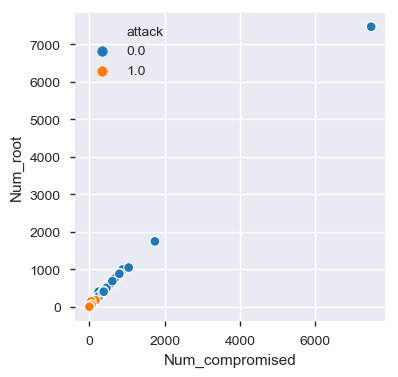

In [90]:
plt.figure(figsize=(4,4))
sns.scatterplot('Num_compromised','Num_root', data=train, hue=y)

**Observation** : Most of the **root access operations** are in **compromised conditions**.

C:\Users\Avinash\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


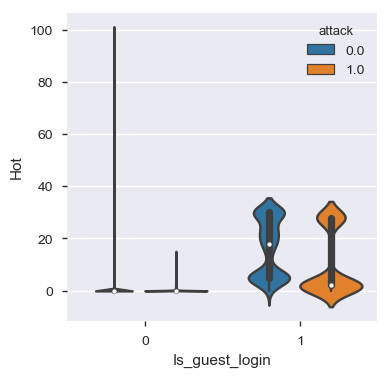

In [91]:
plt.figure(figsize=(4,4))
sns.violinplot('Is_guest_login', 'Hot', data=train, hue=y)

**Observation**: There are very few logins which are not guest.<br>
There are **guest logins** where **hot operations** are between 0-10 and 25-35 **are actually attack connections**.

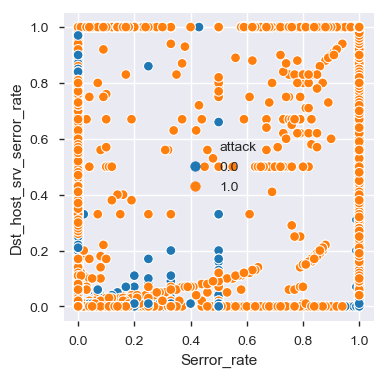

In [92]:
plt.figure(figsize=(4,4))
sns.scatterplot('Serror_rate', 'Dst_host_srv_serror_rate', data=train, hue=y)    

**Observation**: There are a lot of attacks happening.

**Observation**: Serror_rate is a clear indicator of whether an attack is hapenning or not.
Serror_rate greater than 0.5 has a lot of attacks.

In [93]:
np.unique(y[train['Serror_rate'] > 0.5], return_counts=True)

(array([0., 1.]), array([  452, 37050], dtype=int64))

**Observation** : There are 37050 attacks when Serror_rate is greater than 0.5

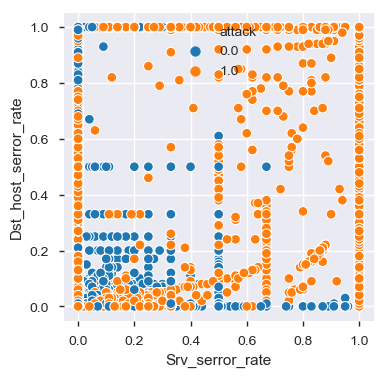

In [94]:
plt.figure(figsize=(4,4))
sns.scatterplot('Srv_serror_rate', 'Dst_host_serror_rate', data=train, hue=y)    

**Observation**: **Srv_serror_rate** and **Dst_host_serror_rate** are clear indicators of attacks happening or not.  <br>
Basically if I draw a diagonal line, it will separate most of the attacks. <br>
Equation of the classification line will be **Srv_serror_rate** + **Dst_host_serror_rate** = 1

In [95]:
np.unique(y[(train['Srv_serror_rate'] + train['Dst_host_serror_rate']) > 1], return_counts=True)

(array([0., 1.]), array([  320, 37056], dtype=int64))

**Observation** : 37056 attacks and 320 normal conditions when Srv_serror_rate + Dst_host_serror_rate greater than 1.

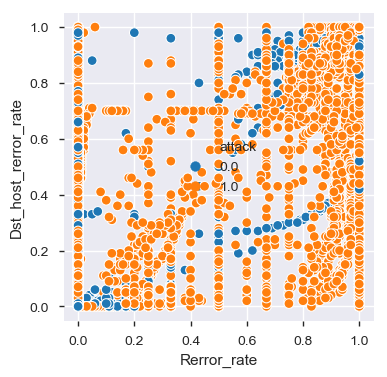

In [96]:
plt.figure(figsize=(4,4))
sns.scatterplot('Rerror_rate', 'Dst_host_rerror_rate', data=train, hue=y)    

**Observation**: Lots of attacks when **rerror_rate** greater than 0.5

In [97]:
y[train['Rerror_rate'] > 0.5].value_counts()
#np.unique(y[train['Rerror_rate'] > 0.5], return_counts=True)

1.0    17547
0.0     3027
Name: attack, dtype: int64

**Observation** : 17547 attacks and 3027 non attacks when rerror_rate greater than 0.5

Now we have done correlation plots and simple multivariate analysis to classify connections which are attack or normal.
Lets try to do this with machine learning algorithms.

# Handling Categorical Variables

In [98]:
encoded_cols = pd.get_dummies(train[cat_cols], drop_first=True)
encoded_cols.shape

(148515, 81)

**Observation**:  <br>
81 columns after one hot encoding. <br>
The dataset is highly cardinal. <br>
We will have to drop them.

# Creating Features and Labels

In [99]:
train.shape

(148515, 43)

In [100]:
X = train.drop(cat_cols, axis = 1)
X = X.drop(['attack', 'Num_outbound_cmds'], axis = 1)

In [101]:
X.shape

(148515, 38)

In [102]:
y = train['attack']
y.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

In [103]:
# We will create a label target as attack or normal
# attack = 1
# normal = 0

y = (y != 'normal').astype(float)
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: attack, dtype: float64

In [104]:
# Lets create our train and validation split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [106]:
# metrics

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, recall_score

In [110]:
def model_train(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name + " Validation Data")
    cm = confusion_matrix(y_test, y_pred)
    print(name +" Confusion Matrix " +" Validation Data")
    print(cm)
    print('-----------------------')
    cr = classification_report(y_test, y_pred)
    print(name +" Classification Report " +" Validation Data")
    print(cr)
    print('------------------------')
    print(name +" AUC Score " +" Validation Data")
    auc = roc_auc_score(y_test, y_pred)
    print("AUC Score " + str(auc))
    print(name +" Recall " +" Validation Data")
    rec = recall_score(y_test, y_pred)
    print("Recall "+ str(rec))
    
    return auc, rec



# Model Building

## Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 10, min_samples_leaf =3, random_state=101)

In [111]:
dt_auc, dt_rec = model_train(dt, "Decision Tree")

Decision Tree Validation Data
Decision Tree Confusion Matrix  Validation Data
[[15233   109]
 [   40 14321]]
-----------------------
Decision Tree Classification Report  Validation Data
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     15342
         1.0       0.99      1.00      0.99     14361

   micro avg       0.99      0.99      0.99     29703
   macro avg       0.99      1.00      0.99     29703
weighted avg       0.99      0.99      0.99     29703

------------------------
Decision Tree AUC Score  Validation Data
AUC Score 0.995054999340025
Decision Tree Recall  Validation Data
Recall 0.9972146786435485


**The metric of our choice should be Recall as we want to minimize FN, which means that an attack accured but the model did not detect it.**

**Observation**: There are 40 cases where attacks are happening but the model is unable to predict it. Our recall is really close to 1.

## Naive Bayes Algorithm

In [112]:
# Naive Bayes Algorithm

from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()

In [114]:
nb_auc, nb_rec = model_train(nb_clf, "Naive Bayes Classifier")

Naive Bayes Classifier Validation Data
Naive Bayes Classifier Confusion Matrix  Validation Data
[[15128   214]
 [14030   331]]
-----------------------
Naive Bayes Classifier Classification Report  Validation Data
              precision    recall  f1-score   support

         0.0       0.52      0.99      0.68     15342
         1.0       0.61      0.02      0.04     14361

   micro avg       0.52      0.52      0.52     29703
   macro avg       0.56      0.50      0.36     29703
weighted avg       0.56      0.52      0.37     29703

------------------------
Naive Bayes Classifier AUC Score  Validation Data
AUC Score 0.5045499482490668
Naive Bayes Classifier Recall  Validation Data
Recall 0.023048534224636166


Naive Bayes Algorithm performed poorly on the Test data with auc roc score of 0.50

## Random Forest Algorithm

In [115]:
# Random Forest Algorithm

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 20, criterion='gini', max_depth = 10, min_samples_split=3, random_state=101)

In [116]:
rf_auc, rf_rec = model_train(rf_clf, "Random Forest Classifier")

Random Forest Classifier Validation Data
Random Forest Classifier Confusion Matrix  Validation Data
[[15239   103]
 [   12 14349]]
-----------------------
Random Forest Classifier Classification Report  Validation Data
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     15342
         1.0       0.99      1.00      1.00     14361

   micro avg       1.00      1.00      1.00     29703
   macro avg       1.00      1.00      1.00     29703
weighted avg       1.00      1.00      1.00     29703

------------------------
Random Forest Classifier AUC Score  Validation Data
AUC Score 0.9962254034651544
Random Forest Classifier Recall  Validation Data
Recall 0.9991644035930646


**Observation** : There are 12 attacks which we werent able to identify. Its recall is better than Decision Tree. <br>


**Observation** : auc roc score is 0.996 which is slightly better than Decision Tree 0.995.  <br>

## XGBoost Classification

In [117]:
from xgboost.sklearn import XGBClassifier
xgb_clf = XGBClassifier(random_state=101)

In [118]:
xgb_auc, xgb_rec = model_train(xgb_clf, "XGBoost Classifier")

XGBoost Classifier Validation Data
XGBoost Classifier Confusion Matrix  Validation Data
[[15168   174]
 [   31 14330]]
-----------------------
XGBoost Classifier Classification Report  Validation Data
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     15342
         1.0       0.99      1.00      0.99     14361

   micro avg       0.99      0.99      0.99     29703
   macro avg       0.99      0.99      0.99     29703
weighted avg       0.99      0.99      0.99     29703

------------------------
XGBoost Classifier AUC Score  Validation Data
AUC Score 0.9932499801136007
XGBoost Classifier Recall  Validation Data
Recall 0.9978413759487501


**Observation** : There are 31 attacks which were misclassified. XGBoost has an AUC score of 0.993 which is very low.

Let try some hyper-parameter tuning to improve XGBoost

## GridSearch on XGBoost

In [119]:
from sklearn.model_selection import GridSearchCV

xgb_gs_clf = XGBClassifier()                         
                        
param_grid = {"max_depth": [7,10],                 # Max depth of each learner (Decision Tree)
              "n_estimators": [50,70,100] ,        # Number of trees
              "gamma": [0.03],                     # Minimum reduction in loss(entropy) to make further branches
              "learning_rate": [0.08],             # Learning Rate
              "min_child_weight": [5],             # Minimum sum of instance weight (hessian) needed in a child
              "colsample_bytree": [0.8],           # Subsample ratio of columns when constructing each tree
              "subsample": [0.85]}                 # Subsample ratio of the training instance

grid_search = GridSearchCV(xgb_gs_clf, 
                           param_grid=param_grid,
                           cv = 2,
                           n_jobs=-1,
                           scoring='neg_log_loss',
                           verbose=2)

grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:   43.4s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.5min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [7, 10], 'n_estimators': [50, 70, 100], 'gamma': [0.03], 'learning_rate': [0.08], 'min_child_weight': [5], 'colsample_bytree': [0.8], 'subsample': [0.85]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=2)

In [120]:
gs_y_pred = grid_search.predict(X_test)

In [121]:
# metrics

cm = confusion_matrix(y_test, gs_y_pred) 
print("Confusion Matrix GridSearchCV XGBoost")
print(cm)
print('-----------------------')
cr = classification_report(y_test, gs_y_pred)
print("Classification Report GridSearchCV XGBoost")
print(cr)
print('------------------------')
gs_auc = roc_auc_score(y_test, gs_y_pred)
print("AUC Score ", gs_auc)
print('------------------------')
gs_rec = recall_score(y_test, gs_y_pred)
print("Recall  ", gs_rec)

Confusion Matrix GridSearchCV XGBoost
[[15320    22]
 [    9 14352]]
-----------------------
Classification Report GridSearchCV XGBoost
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15342
         1.0       1.00      1.00      1.00     14361

   micro avg       1.00      1.00      1.00     29703
   macro avg       1.00      1.00      1.00     29703
weighted avg       1.00      1.00      1.00     29703

------------------------
AUC Score  0.9989696652960369
------------------------
Recall   0.9993733026947984


**Observation** : Only 9 attacks misclassified. This is a big improvement over XGBoost. Lets see the best parameters.

In [122]:
print(grid_search.best_params_)

{'colsample_bytree': 0.8, 'gamma': 0.03, 'learning_rate': 0.08, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.85}


**Observation** : auc roc score of 0.998 which is the best model. <br>

# Conclusion

In [163]:
rec_scores = [dt_rec, nb_rec, rf_rec, xgb_rec, gs_rec]
label = ['dt', 'nb', 'rf', 'xgb', 'gs']
index = np.arange(len(rec_scores))
print(list(zip(label, rec_scores)))

[('dt', 0.9972146786435485), ('nb', 0.023048534224636166), ('rf', 0.9991644035930646), ('xgb', 0.9978413759487501), ('gs', 0.9993733026947984)]


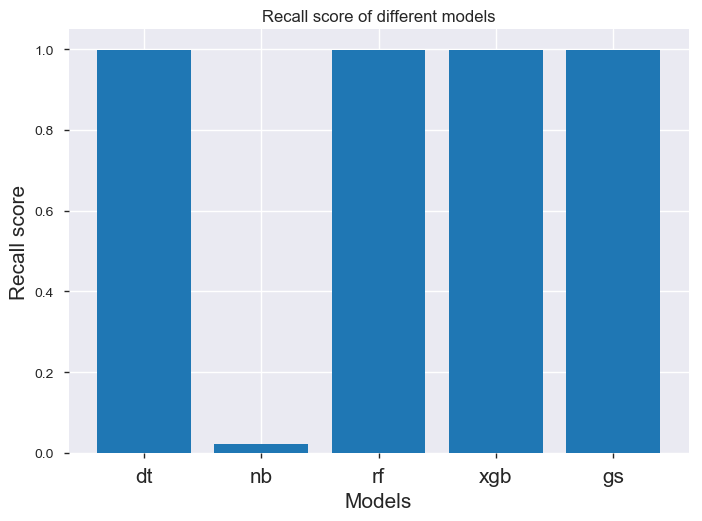

In [164]:
plt.bar(index, rec_scores)
plt.xlabel('Models', fontsize=15)
plt.ylabel('Recall score', fontsize=15)
plt.xticks(index, label, fontsize=15)
plt.title('Recall score of different models')
plt.show()

Grid Search XGBoost has provided the best accuracy score followed by Random Forest.

In [129]:
auc_scores = [dt_auc, nb_auc, rf_auc, xgb_auc, gs_auc]
label = ['dt', 'nb', 'rf', 'xgb', 'gs']
index = np.arange(len(auc_scores))
print(list(zip(label, auc_scores)))

[('dt', 0.995054999340025), ('nb', 0.5045499482490668), ('rf', 0.9962254034651544), ('xgb', 0.9932499801136007), ('gs', 0.9989696652960369)]


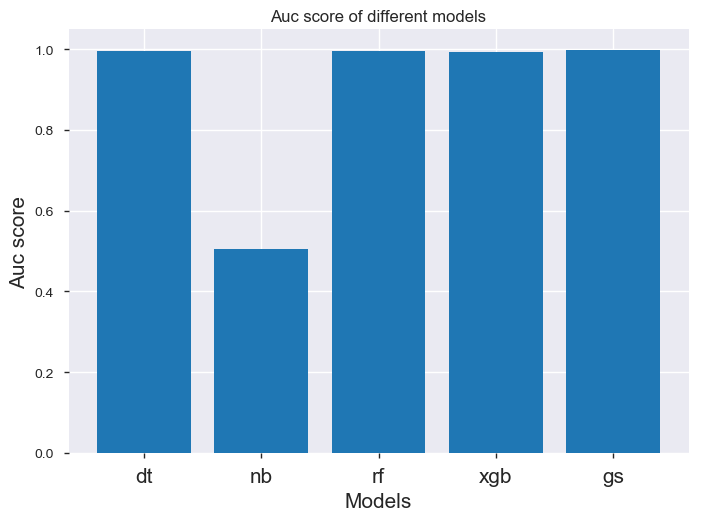

In [130]:
plt.bar(index, auc_scores)
plt.xlabel('Models', fontsize=15)
plt.ylabel('Auc score', fontsize=15)
plt.xticks(index, label, fontsize=15)
plt.title('Auc score of different models')
plt.show()

Grid Search XGBoost has provided the best auc score followed by Random Forest.

# Problem Statement 2: Attack Class

In [131]:
DoS = ['back','land','neptune','pod','smurf','teardrop','apache2','udpstorm',
      'processtable','worm']
Probe = ['satan','ipsweep','nmap','portsweep','mscan','saint']
R2L = ['guess_passwd','ftp_write','imap','phf','multihop','warezmaster',
      'warezclient','spy','xlock','xsnoop','snmpguess','snmpgetattack',
       'httptunnel','sendmail','named']
U2R = ['buffer_overflow','loadmodule','rootkit','perl','sqlattack','xterm','ps']

In [132]:
train['attack'].nunique()

40

In [133]:
def attackclass(x):
    if x in DoS:
        return 'DoS'
    elif x in Probe:
        return 'Probe'
    elif x in R2L:
        return 'R2l'
    elif x in U2R:
        return 'U2R'
    elif x == 'normal':
        return 'normal'
    else:
        return 'unknown'


In [134]:
train['attackclass'] = train['attack'].apply(attackclass)

In [135]:
train['attackclass'].value_counts()

normal     77053
DoS        53093
Probe      14077
R2l         3880
unknown      293
U2R          119
Name: attackclass, dtype: int64

**There are 293 unknown attack connections which are present in the test data.**

In [136]:
X2 = train.drop(cat_cols, axis = 1)
X2 = X2.drop(['attack', 'Num_outbound_cmds','attackclass'], axis = 1)

In [137]:
normal_df = train[train['attackclass'] == 'normal']

In [138]:
X2 = X2.drop(normal_df.index, axis=0)

In [139]:
X2.shape

(60008, 38)

In [140]:
y2 = train['attackclass']
y2 = y2.drop(normal_df.index, axis=0)

In [141]:
y2.shape

(60008,)

In [142]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=101)

In [149]:
from sklearn.metrics import accuracy_score

In [150]:
def model2_train(model, name):
    model.fit(X_train2, y_train2)
    y_pred = model.predict(X_test2)
    print(name + " Validation Data")
    cm = confusion_matrix(y_test2, y_pred)
    print(name +" Confusion Matrix " +" Validation Data")
    print(cm)
    print('-----------------------')
    cr = classification_report(y_test2, y_pred)
    print(name +" Classification Report " +" Validation Data")
    print(cr)
    print('------------------------')
    print(name +" Accuracy Score " +" Validation Data")
    acc = accuracy_score(y_test2, y_pred)
    print("Accuracy "+ str(acc))
    return acc



**Here our metric of choice should be accuracy as we want to predict how many classes we have correctly identified in this multiclass classification.**

# Model Building

## Decision Tree

In [144]:
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 10, min_samples_leaf =3, random_state=101)

In [151]:
dt2_acc = model2_train(dt, "Decision Tree")

Decision Tree Validation Data
Decision Tree Confusion Matrix  Validation Data
[[9092    3    1    0    0]
 [   4 2402    4    2    0]
 [   3    5  432    4    0]
 [   5    2    2   14    0]
 [   0    0    0    0   27]]
-----------------------
Decision Tree Classification Report  Validation Data
              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      9096
       Probe       1.00      1.00      1.00      2412
         R2l       0.98      0.97      0.98       444
         U2R       0.70      0.61      0.65        23
     unknown       1.00      1.00      1.00        27

   micro avg       1.00      1.00      1.00     12002
   macro avg       0.94      0.92      0.92     12002
weighted avg       1.00      1.00      1.00     12002

------------------------
Decision Tree Accuracy Score  Validation Data
Accuracy 0.9970838193634394


**Observation**: We are correctly predicting all the classes 99.7% 

## Naive Bayes

In [152]:
nb_clf = GaussianNB()

In [153]:
nb2_acc = model2_train(nb_clf, "Naive Bayes ")

Naive Bayes  Validation Data
Naive Bayes  Confusion Matrix  Validation Data
[[8825   43   13  215    0]
 [2229  163   20    0    0]
 [ 402   16   23    3    0]
 [  21    0    0    2    0]
 [   0    0    0    0   27]]
-----------------------
Naive Bayes  Classification Report  Validation Data
              precision    recall  f1-score   support

         DoS       0.77      0.97      0.86      9096
       Probe       0.73      0.07      0.12      2412
         R2l       0.41      0.05      0.09       444
         U2R       0.01      0.09      0.02        23
     unknown       1.00      1.00      1.00        27

   micro avg       0.75      0.75      0.75     12002
   macro avg       0.58      0.44      0.42     12002
weighted avg       0.75      0.75      0.68     12002

------------------------
Naive Bayes  Accuracy Score  Validation Data
Accuracy 0.7532077987002166


**Observation**: We have correctly predicted 75.3% all the classes.

## Random Forest

In [154]:
rf_clf = RandomForestClassifier(n_estimators = 20, criterion='gini', max_depth = 10, min_samples_split=3, random_state=101)

In [166]:
rf2_acc = model2_train(rf_clf, "Random Forest ")

Random Forest  Validation Data
Random Forest  Confusion Matrix  Validation Data
[[9089    3    4    0    0]
 [   1 2408    2    1    0]
 [   2   13  426    3    0]
 [   1    0   12   10    0]
 [   0    0    0    0   27]]
-----------------------
Random Forest  Classification Report  Validation Data
              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      9096
       Probe       0.99      1.00      1.00      2412
         R2l       0.96      0.96      0.96       444
         U2R       0.71      0.43      0.54        23
     unknown       1.00      1.00      1.00        27

   micro avg       1.00      1.00      1.00     12002
   macro avg       0.93      0.88      0.90     12002
weighted avg       1.00      1.00      1.00     12002

------------------------
Random Forest  Accuracy Score  Validation Data
Accuracy 0.9965005832361273


**Observation**: Random Forest is able to classify all the classes at 99.6%. This is slightly less than Decision Tree.

## XGBoost Classifier

In [157]:
xgb_clf = XGBClassifier(random_state=101)

In [158]:
xgb2_acc = model2_train(xgb_clf, "XGBoost Classifier")

XGBoost Classifier Validation Data
XGBoost Classifier Confusion Matrix  Validation Data
[[9087    2    7    0    0]
 [   3 2404    4    1    0]
 [   2    3  436    3    0]
 [   3    0    3   17    0]
 [   0    0    0    0   27]]
-----------------------
XGBoost Classifier Classification Report  Validation Data
              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      9096
       Probe       1.00      1.00      1.00      2412
         R2l       0.97      0.98      0.98       444
         U2R       0.81      0.74      0.77        23
     unknown       1.00      1.00      1.00        27

   micro avg       1.00      1.00      1.00     12002
   macro avg       0.96      0.94      0.95     12002
weighted avg       1.00      1.00      1.00     12002

------------------------
XGBoost Classifier Accuracy Score  Validation Data
Accuracy 0.9974170971504749


**Observation**: XGBoost is able to classify all the classes at 99.7% accuracy. This is better than Decision Tree. One of the best model so far. Lets see if we can tune it even further.

## GridSearch on XGBoost

In [159]:
xgb_gs_clf = XGBClassifier()                         
                        
param_grid = {"max_depth": [7,10],
              "n_estimators": [50,70,100] , 
              "gamma": [0.03], 
              "learning_rate": [0.08],
              "min_child_weight": [5], 
              "colsample_bytree": [0.8], 
              "subsample": [0.85]} 

grid_search = GridSearchCV(xgb_gs_clf, 
                           param_grid=param_grid,
                           cv = 2,
                           n_jobs=-1,
                           scoring='neg_log_loss',
                           verbose=2)

grid_search.fit(X_train2,y_train2)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:   56.9s remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.1min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [7, 10], 'n_estimators': [50, 70, 100], 'gamma': [0.03], 'learning_rate': [0.08], 'min_child_weight': [5], 'colsample_bytree': [0.8], 'subsample': [0.85]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=2)

In [160]:
gs_y_pred = grid_search.predict(X_test2)

In [170]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.03,
 'learning_rate': 0.08,
 'max_depth': 10,
 'min_child_weight': 5,
 'n_estimators': 100,
 'subsample': 0.85}

In [162]:
print("XGBoost Validation Data")
cm = confusion_matrix(y_test2, gs_y_pred)
print(" XGBoost Confusion Matrix " +" Validation Data")
print(cm)
print('-----------------------')
cr = classification_report(y_test2, gs_y_pred)
print(" XGBoost Classification Report " +" Validation Data")
print(cr)
print('------------------------')
print("XGBoost Accuracy Score " +" Validation Data")
gs2_acc = accuracy_score(y_test2, gs_y_pred)
print("Accuracy "+ str(gs2_acc))


XGBoost Validation Data
 XGBoost Confusion Matrix  Validation Data
[[9094    0    1    1    0]
 [   1 2408    2    1    0]
 [   2    0  439    3    0]
 [   2    0    6   15    0]
 [   0    0    0    0   27]]
-----------------------
 XGBoost Classification Report  Validation Data
              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      9096
       Probe       1.00      1.00      1.00      2412
         R2l       0.98      0.99      0.98       444
         U2R       0.75      0.65      0.70        23
     unknown       1.00      1.00      1.00        27

   micro avg       1.00      1.00      1.00     12002
   macro avg       0.95      0.93      0.94     12002
weighted avg       1.00      1.00      1.00     12002

------------------------
XGBoost Accuracy Score  Validation Data
Accuracy 0.9984169305115814


**Observation**: XGBoost with grid search is the best model which classifies all the attack classes with 99.8% accuracy. This is the best model so far.

# Conclusion

In [168]:
acc2_scores = [dt2_acc, nb2_acc, rf2_acc, xgb2_acc, gs2_acc]
label = ['dt', 'nb', 'rf', 'xgb', 'gs']
index = np.arange(len(acc2_scores))
print(list(zip(label, acc2_scores)))

[('dt', 0.9970838193634394), ('nb', 0.7532077987002166), ('rf', 0.9965005832361273), ('xgb', 0.9974170971504749), ('gs', 0.9984169305115814)]


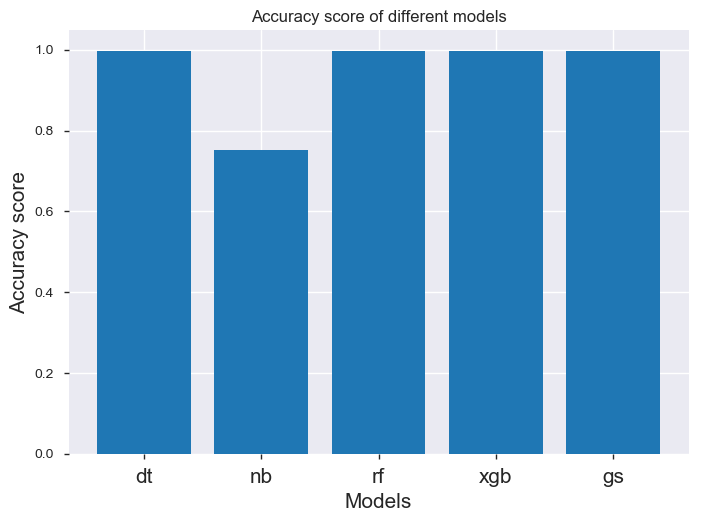

In [169]:
plt.bar(index, acc2_scores)
plt.xlabel('Models', fontsize=15)
plt.ylabel('Accuracy score', fontsize=15)
plt.xticks(index, label, fontsize=15)
plt.title('Accuracy score of different models')
plt.show()

Grid Search XGBoost has provided the best accuracy score followed by XGBoost and Decision Tree.

## Final Thoughts

To build a classifier to identify **attack or normal** connection we would use **GridSearchCV on XGBoost** to build the best XGBoost classifier.<br>
The model had the following metrics:  
- auc = 0.9989
- recall score = 0.9993

Once the connection has been identified as attack, to categorize type of attack as DoS, Probe, R2L or U2R; we will use another **XGBoost model whose hyperparameters have been tuned using GridSearchCV**. <br>

The model has the following metrics:  
- Accuracy = 0.998


